# Hypothesis test of impact on insectisides on bees

Source Article: [Neonicotinoid insecticides can serve as inadvertent insect contraceptives](https://royalsocietypublishing.org/doi/10.1098/rspb.2016.0506#d3e1436)

Data Source: [Neonicotinoid insecticides can serve as inadvertent insect contraceptives](https://datadryad.org/stash/dataset/doi:10.5061/dryad.bs515)

## Question: Do neonicotinoid insecticides have unintended consequences?

### About the study
Study was conducted in United States to collect the information on impact of neonicotinoid insecticides on bees. In study researchers investigated the effects of neonicotinoids on the sperm of pollinating bees.

Study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

### Tasks to perform
* Extract the data from source and Clean the data
* Exploratory Data Analysis of the Data
* Bootstrap hypothesis test on bee sperm counts

In [22]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Extract and Clean Data 

In [23]:
# Extract data and save as dataframe

bee_sperm = pd.read_excel(r'data/Straub_et_al_Drone_Pesticide_Complete_Data_FINAL_Review.xls',
                          sheet_name='Drone Sperm Data')

# Get data untreated bees (control) and bees treated with pesticides (treated)
# Save data as numpy array

control = np.array(bee_sperm[bee_sperm['Treatment'] == 'Control']['Alive Sperm Millions'])
treated = np.array(bee_sperm[bee_sperm['Treatment'] == 'Pesticide']['Alive Sperm Millions'])

#### EDA - Plot ECDF (Empirical Cumulative Distribution Function)

In [24]:
# Function to compute ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

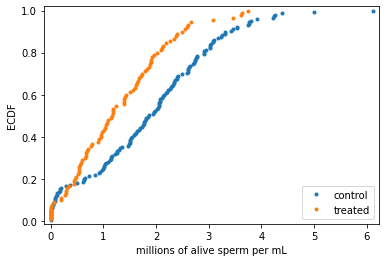

In [25]:
# EDA, Plot ECDFs of alive sperm count for untreated bees (control) 
# and bees treated with pesticide (treated)

# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

#### Bootstrap hypothesis testing

#### Null hypothesis

On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees.

In [26]:
# Function to compute bootstrap hypothesis testing

# Bootstrap replicate function
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# Generating many bootstrap replicates
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [27]:
# Bootstrap hypothesis test on bee sperm counts with size 1 million

# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=1000000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=1000000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 1.9e-05


#### Conclusion: 
`p-value` is very very small for 1 million replicates, which concludes null hypothesis is false (nullified).